# Predicting most Efficient Interventions for Life Span Increase
#### Data Literacy at University of Tübingen, Winter 2023/24

---
&copy; Daniel Flat, Jackson Harmon, Eric Nazarenus, Aline Bittler 2024. [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)

Template by Philipp Hennig, 2023. [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from tueplots import bundles

In [2]:
#Defining Constants
COLOR_MAP = ["#ADD8E6", "#008000", "#FFD700", "#800080", "#FF7F50", "#40E0D0", "#708090", "#FF8C00", "#FF00FF", "#008080"]

# tueplots settings
COL_STATE = 'half'
NROWS = 1
NCOLS = 1
USE_LATEX = False

In [3]:
# Load the CSV file into a pandas DataFrame
df_aging = pd.read_csv('../dat/motivation_dataset/Aging.csv', header = 1)

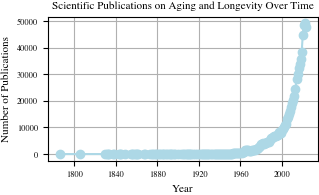

In [4]:
# Drop 2024 (just started)
df_aging = df_aging.drop([0])
# Convert 'year' to datetime format for proper time series plotting
df_aging['Year'] = pd.to_datetime(df_aging['Year'], format='%Y')

# Set 'year' as the index
df_aging.set_index('Year', inplace=True)

plt.rcParams.update(bundles.icml2022(column=COL_STATE, nrows=NROWS, ncols=NCOLS, usetex=USE_LATEX))

# Plot the time series
fig, ax = plt.subplots()
ax.plot(df_aging.index, df_aging['Count'], marker='o', linestyle='-', color=COLOR_MAP[0])
ax.set_title('Scientific Publications on Aging and Longevity Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Publications')
ax.grid(True)
plt.show()


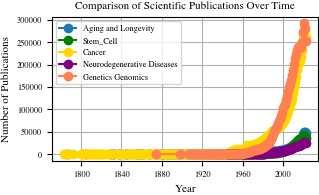

In [5]:
# Define a list of topic file names
topic_files = ['../dat/motivation_dataset/Aging.csv', '../dat/motivation_dataset/Stem_Cell.csv', 
               '../dat/motivation_dataset/Cancer.csv','../dat/motivation_dataset/Neurodegenerative Diseases.csv','../dat/motivation_dataset/Genetics Genomics.csv'
              ]

# Initialize an empty list to store DataFrames
dfs = []
topic_names = []

# Load data for each topic and append to the list
for file in topic_files:
    topic_name = os.path.splitext(os.path.basename(file))[0]  # Extract topic name from file name    
    df = pd.read_csv(file, header = 1)
    df = df.drop(0)
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    dfs.append(df)
    topic_names.append(topic_name)

# Plot multiple time series
plt.figure()
plt.plot(dfs[0].index, dfs[0]['Count'], marker='o', linestyle='-', label='Aging and Longevity')

# Plot time series for other topics using a loop
for i in range(1, len(dfs)):
    plt.plot(dfs[i].index, dfs[i]['Count'], marker='o', linestyle='-', label=topic_names[i], color = COLOR_MAP[i])

plt.title('Comparison of Scientific Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()


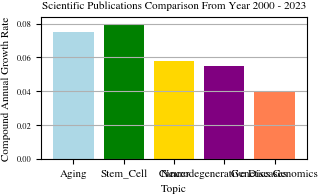

In [6]:
# Define a list of topic file names
topic_files = ['../dat/motivation_dataset/Aging.csv', '../dat/motivation_dataset/Stem_Cell.csv', 
               '../dat/motivation_dataset/Cancer.csv','../dat/motivation_dataset/Neurodegenerative Diseases.csv','../dat/motivation_dataset/Genetics Genomics.csv'
              ]

# Initialize an empty list to store DataFrames
dfs = []
topic_names = []

# Load data for each topic and append to the list
for file in topic_files:
    topic_name = os.path.splitext(os.path.basename(file))[0]  # Extract topic name from file name
    df = pd.read_csv(file)
    df = pd.read_csv(file, header = 1)
    df = df.drop(0)
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    dfs.append(df)
    topic_names.append(topic_name)

# Calculate Compound Annual Growth Rate for each topic since year 2000
cagr = []
for i in range(len(dfs)):
    cagr.append((((dfs[i]['Count'].iloc[0] / dfs[i]['Count'].iloc[23]) ** (1 / 23)) -1))    

# Plot the CAGR values for each topic
plt.figure()
plt.bar(topic_names, cagr, color=COLOR_MAP)
plt.title('Scientific Publications Comparison From Year 2000 - 2023')
plt.xlabel('Topic')
plt.ylabel('Compound Annual Growth Rate')
plt.xticks(rotation=0, fontsize=8)
plt.grid(axis='y')
plt.show()


/var/folders/4n/gxws16r93l162vycp0sjx3940000gn/T/ipykernel_50521/2278433760.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(topic_names, rotation=45, ha='right')


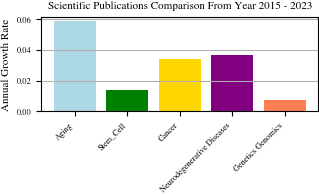

In [7]:
# Define a list of topic file names
topic_files = ['../dat/motivation_dataset/Aging.csv', '../dat/motivation_dataset/Stem_Cell.csv', 
               '../dat/motivation_dataset/Cancer.csv','../dat/motivation_dataset/Neurodegenerative Diseases.csv','../dat/motivation_dataset/Genetics Genomics.csv'
              ]

# Initialize an empty list to store DataFrames
dfs = []
topic_names = []

# Load data for each topic and append to the list
for file in topic_files:
    topic_name = os.path.splitext(os.path.basename(file))[0]  # Extract topic name from file name
    df = pd.read_csv(file)
    df = pd.read_csv(file, header = 1)
    df = df.drop(0)
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df.set_index('Year', inplace=True)
    dfs.append(df)
    topic_names.append(topic_name)

# Calculate Compound Annual Growth Rate for each topic since year 2015
cagr = []
for i in range(len(dfs)):
    cagr.append((((dfs[i]['Count'].iloc[0] / dfs[i]['Count'].iloc[8]) ** (1 / 8)) -1))    

# Plot the CAGR values for each topic
fig, ax = plt.subplots()
ax.bar(topic_names, cagr, color=COLOR_MAP)
ax.set_title('Scientific Publications Comparison From Year 2015 - 2023')
# ax.set_xlabel('Topic')
ax.set_ylabel('Annual Growth Rate')
ax.set_xticklabels(topic_names, rotation=45, ha='right')
ax.grid(axis='y')

plt.savefig('../fig/2401_003_motivational_analysis.pdf')